In [133]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [134]:
df = pd.read_csv("Coca-Cola_stock_history.csv")
df.Date = pd.to_datetime(df.Date, dayfirst=True)
df.shape

(15311, 9)

In [135]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For time stamps
from datetime import datetime
# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

In [136]:
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from keras.models import Sequential
from keras.layers import Dense, LSTM
import math

from keras.models import Sequential # Create Model
from keras.layers import Dense # Neurons
from keras.layers import LSTM # Long Short Term Memory
from sklearn.preprocessing import MinMaxScaler # Normalize
from sklearn.metrics import mean_squared_error # Loss Function
from sklearn.model_selection import train_test_split

In [137]:
df.drop(df.columns[[0]], axis = 1, inplace = True)
df.rename(columns={'Converted Date': 'Date'}, inplace=True)
df.set_index('Date',inplace=True)
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
02/01/1962,0.050016,0.051378,0.050016,0.050016,806400,0.0,0
03/01/1962,0.049273,0.049273,0.048159,0.048902,1574400,0.0,0
04/01/1962,0.049026,0.049645,0.049026,0.049273,844800,0.0,0
05/01/1962,0.049273,0.049892,0.048035,0.048159,1420800,0.0,0
08/01/1962,0.047787,0.047787,0.046735,0.047664,2035200,0.0,0


In [138]:
scale = MinMaxScaler()
scalled = scale.fit_transform(df)
i = 0
for col in df.columns:
    df[col] = scalled[:,i]
    i += 1

In [182]:
df.describe()

AttributeError: 'numpy.ndarray' object has no attribute 'describe'

In [140]:
x, y = df.drop('Stock Splits', axis=1), df['Stock Splits']

In [141]:
data = df.filter(['Close'])
dataset = data.values #convert the data frame to a numpy array
training_data_len = math.ceil(len(dataset)*.8)  # number of rows to train the model on
training_data_len

12249

In [142]:
#scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

train_data = scaled_data[0:training_data_len, :]
#Split the data into x_train, y_train datasets
x_train = []
y_train = []
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i,0])
    if i<=60:
        print(x_train)
        print(y_train)
        print()

[array([0.00019913, 0.00018205, 0.00018774, 0.00017066, 0.00016307,
       0.00017635, 0.00018015, 0.00018774, 0.00018205, 0.00017446,
       0.00016117, 0.00013839, 0.00012416, 0.00014599, 0.00015168,
       0.00013649, 0.0001289 , 0.00012321, 0.00011561, 0.00011561,
       0.00011277, 0.00014029, 0.00014599, 0.00015358, 0.00015358,
       0.00014409, 0.00014788, 0.00014978, 0.00015358, 0.00014788,
       0.00014788, 0.00013459, 0.0001308 , 0.0001308 , 0.00014219,
       0.00013839, 0.00013459, 0.000127  , 0.00013839, 0.00014219,
       0.0001289 , 0.0001251 , 0.0001327 , 0.00012321, 0.00013839,
       0.0001289 , 0.0001308 , 0.00012321, 0.00013839, 0.00014966,
       0.00015062, 0.0001468 , 0.0001468 , 0.00015062, 0.00015826,
       0.00016781, 0.00017546, 0.00018883, 0.00017928, 0.00017355])]
[0.0001678142719017435]



In [143]:
#convert the x_train and y_train  to numpy array
x_train,y_train = np.array(x_train), np.array(y_train)
#reshape the data
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(12189, 60, 1)

In [144]:
#Build the LSTM model (Long Term Short Memory)
model =Sequential()
model.add(LSTM(64,return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(64, return_sequences= False))
model.add(Dense(32))
model.add(Dense(1))
#Complie the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [145]:
#Train the model
model.fit(x_train,y_train, batch_size=1, epochs=10)

Epoch 1/10
12189/12189 [==============================] - 183s 15ms/step - loss: 7.5703e-05
Epoch 2/10
12189/12189 [==============================] - 176s 14ms/step - loss: 2.8538e-05
Epoch 3/10
12189/12189 [==============================] - 179s 15ms/step - loss: 2.3031e-05
Epoch 4/10
12189/12189 [==============================] - 175s 14ms/step - loss: 1.9313e-05
Epoch 5/10
12189/12189 [==============================] - 175s 14ms/step - loss: 1.6812e-05
Epoch 6/10
12189/12189 [==============================] - 179s 15ms/step - loss: 1.5579e-05
Epoch 7/10
12189/12189 [==============================] - 175s 14ms/step - loss: 1.4708e-05
Epoch 8/10
12189/12189 [==============================] - 207s 17ms/step - loss: 1.3207e-05
Epoch 9/10
12189/12189 [==============================] - 179s 15ms/step - loss: 1.3150e-05
Epoch 10/10
12189/12189 [==============================] - 184s 15ms/step - loss: 1.1994e-05


In [146]:
test_data= scaled_data[training_data_len-60:, :]
#create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:,:]
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [147]:
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))
x_test.shape

(3062, 60, 1)

In [148]:
#predicting the data
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

96/96 [==============================] - 2s 13ms/step


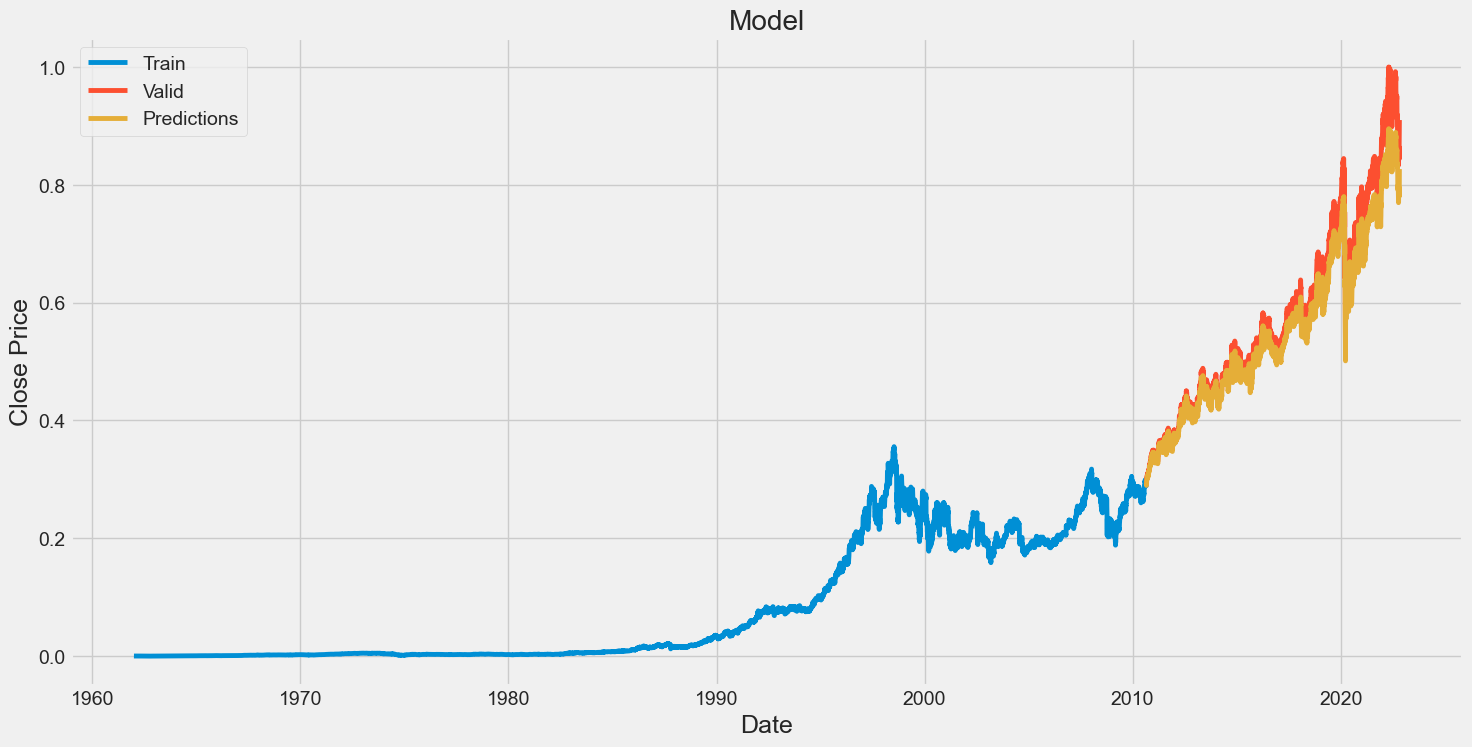

"pd.options.mode.chained_assignment = None  # default='warn'\n#Visualize the data\nplt.figure(figsize=(16,8))\nplt.title('Model')\nplt.xlabel('Date', fontsize=18)\nplt.ylabel('Close Price' ,fontsize=18)\nplt.xlim(1962, 2032)\nplt.plot(train['Close'],linewidth=3.5)\nplt.plot(valid[['Close','Predictions']],linewidth=3.5)\nplt.legend(['Train','Valid','Predictions'])"

In [149]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

# Modify the index to datetime
train.index = pd.to_datetime(train.index, dayfirst = True)
valid.index = pd.to_datetime(valid.index, dayfirst = True)

# Plot the data
plt.figure(figsize=(16, 8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.plot(train['Close'], linewidth=3.5)
plt.plot(valid[['Close', 'Predictions']], linewidth=3.5)
plt.legend(['Train', 'Valid', 'Predictions'])
plt.show()

'''pd.options.mode.chained_assignment = None  # default='warn'
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price' ,fontsize=18)
plt.xlim(1962, 2032)
plt.plot(train['Close'],linewidth=3.5)
plt.plot(valid[['Close','Predictions']],linewidth=3.5)
plt.legend(['Train','Valid','Predictions'])'''

In [150]:
valid

,Close,Predictions
Date,,
2010-08-30,0.291170,0.292429
2010-08-31,0.292903,0.289730
2010-09-01,0.300413,0.290989
2010-09-02,0.300780,0.298348
2010-09-03,0.301726,0.299126
...,...,...
2022-10-20,0.843929,0.792047
2022-10-21,0.857422,0.780030
2022-10-24,0.882107,0.787988


In [151]:
#get the quote
coca_quote = pd.read_csv('Coca-Cola_stock_history.csv')
#Create new data frame
new_df = coca_quote.filter(['Close'])
#get the last 60 days closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values
#scaled the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#create an empty list
X_test = []
#append the past 60 days 
X_test.append(last_60_days_scaled)
#convert the X_test data set to a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test,(X_test.shape[0], X_test.shape[1],1))
#get the predicted scaled price
pred_price= model.predict(X_test)
#undo the scalling
pred_price = scaler.inverse_transform(pred_price)
pred_price

1/1 [==============================] - 0s 21ms/step


array([[1.7167735]], dtype=float32)

In [152]:
#importing packages for the prediction of time-series data
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

from sklearn.metrics import mean_squared_error

%matplotlib inline

In [153]:
import pandas as pd
import numpy as np
import math
import datetime as dt

import matplotlib.pyplot as plt
from itertools import cycle
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import seaborn as sns

!pip install xgboost
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler

from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)

In [154]:
df = pd.read_csv('Coca-Cola_stock_history.csv', parse_dates=['Converted Date'], dayfirst=True)
df1 = df[['Converted Date','Close']]
df1.rename(columns={'Converted Date': 'Date'}, inplace=True)
df1.head(3)

,Date,Close
0,1962-01-02,0.050016
1,1962-01-03,0.048902
2,1962-01-04,0.049273


In [155]:
# Setting the Date as Index
df_ts = df1.set_index('Date')
df_ts.sort_index(inplace=True)
print (type(df_ts))
print (df_ts.head(3))
print ("========================")
print (df_ts.tail(3))

<class 'pandas.core.frame.DataFrame'>
               Close
Date                
1962-01-02  0.050016
1962-01-03  0.048902
1962-01-04  0.049273
                Close
Date                 
2022-10-24  57.570000
2022-10-25  58.950001
2022-10-26  59.389999


<Axes: xlabel='Date'>

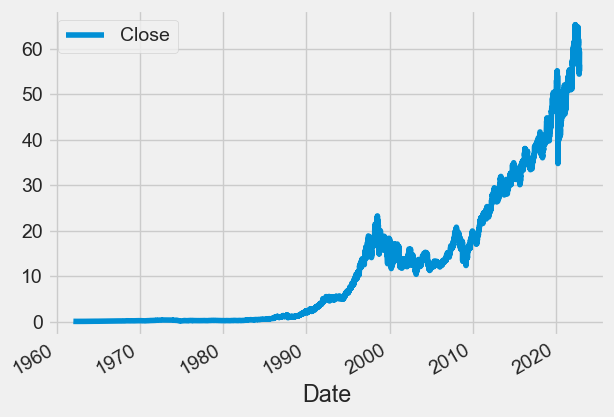

In [156]:
# Basic plot 
df_ts.plot()

In [157]:
# Dickey Fuller Test Function
def test_stationarity(timeseries):
    # Perform Dickey-Fuller test:
    from statsmodels.tsa.stattools import adfuller
    print('Results of Dickey-Fuller Test:')
    print ("==============================================")
    
    dftest = adfuller(timeseries, autolag='AIC')
    
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#lags Used', 'Number of Observations Used'])
    
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    
    print(dfoutput)

In [158]:
# Convert the DF to series first
ts = df_ts['Close']

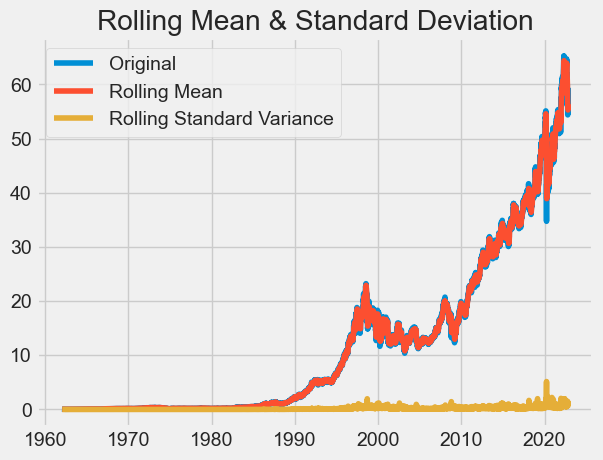

In [159]:
# Rolling Statistics
rolmean = ts.rolling(window=12).mean()
rolvar = ts.rolling(window=12).std()

plt.plot(ts, label='Original')
plt.plot(rolmean, label='Rolling Mean')
plt.plot(rolvar, label='Rolling Standard Variance')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [160]:
test_stationarity(ts)

Results of Dickey-Fuller Test:
Test Statistic                     2.318269
p-value                            0.998966
#lags Used                        43.000000
Number of Observations Used    15267.000000
Critical Value (1%)               -3.430778
Critical Value (5%)               -2.861729
Critical Value (10%)              -2.566871
dtype: float64


In [161]:
# Lets Resample the data by Month and analyze again
df_ts_m = df_ts.resample('M').mean()
print (type(df_ts_m))
print (df_ts_m.head(3))

<class 'pandas.core.frame.DataFrame'>
               Close
Date                
1962-01-31  0.047101
1962-02-28  0.046269
1962-03-31  0.046883


In [162]:
tsm = df_ts_m['Close']
print (type(tsm))

<class 'pandas.core.series.Series'>


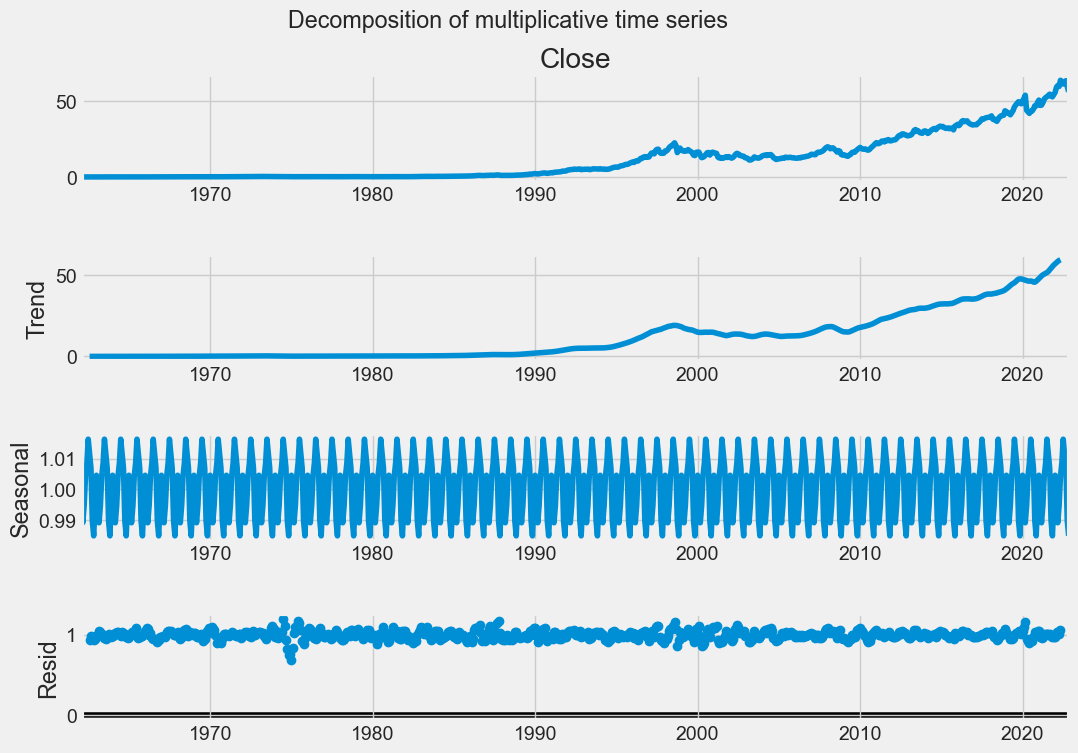

In [163]:
# Lets do a quick vanila decomposition to see any trend seasonality etc in the ts
decomposition = sm.tsa.seasonal_decompose(tsm, model='multiplicative')

fig = decomposition.plot()
fig.set_figwidth(12)
fig.set_figheight(8)
fig.suptitle('Decomposition of multiplicative time series')
plt.show()

In [164]:
# lets try to make the "tsm" Stationary

tsmlog = np.log10(tsm)
tsmlog.dropna(inplace=True)

tsmlogdiff = tsmlog.diff(periods=1)
tsmlogdiff.dropna(inplace=True)
# Stationarity Check
test_stationarity(tsmlogdiff)

Results of Dickey-Fuller Test:
Test Statistic                -1.815932e+01
p-value                        2.463771e-30
#lags Used                     1.000000e+00
Number of Observations Used    7.270000e+02
Critical Value (1%)           -3.439377e+00
Critical Value (5%)           -2.865524e+00
Critical Value (10%)          -2.568891e+00
dtype: float64


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



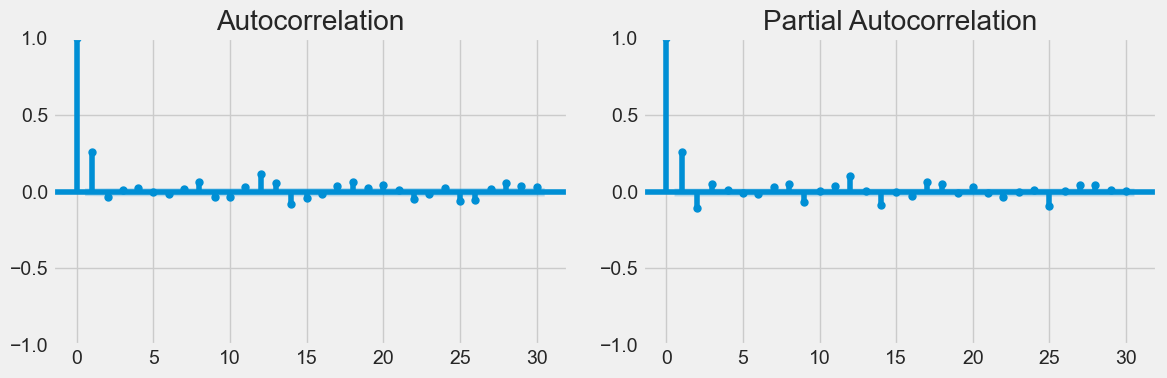

In [165]:
# Let's plot ACF & PACF graphs to visualize AR & MA components

fig, axes = plt.subplots(1, 2)
fig.set_figwidth(12)
fig.set_figheight(4)
smt.graphics.plot_acf(tsmlogdiff, lags=30, ax=axes[0], alpha=0.5)
smt.graphics.plot_pacf(tsmlogdiff, lags=30, ax=axes[1], alpha=0.5)
plt.tight_layout()

In [166]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], utc=True)

# Define start and end dates as datetime objects
start_date = pd.to_datetime('2021-01-01', utc=True)
end_date = pd.to_datetime('2022-01-01', utc=True)

# Filter data for the year 2021 using datetime values
y_2021 = df.loc[(df['Date'] >= start_date) & (df['Date'] < end_date)]

# Group by month and calculate mean of 'Open' and 'Close' columns
monthvise = y_2021.groupby(y_2021['Date'].dt.strftime('%B'))[['Open', 'Close']].mean()

# Specify the order of months
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December']

# Reorder rows in the DataFrame
monthvise = monthvise.reindex(new_order, axis = 0)
monthvise

C:\Users\Ryan Abe Cortez\AppData\Local\Temp\ipykernel_15456\1835172080.py:2: UserWarning:

Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.



,Open,Close
Date,,
January,46.810466,46.714286
February,47.916931,47.896767
March,49.164846,49.376644
April,50.883667,50.828891
May,51.655691,51.688695
June,52.766376,52.661758
July,53.362784,53.424143
August,53.800601,53.773003
September,52.954450,52.789584


In [167]:
y_2021.groupby(y_2021['Date'].dt.strftime('%B'))['Low'].min()
monthvise_high = y_2021.groupby(df['Date'].dt.strftime('%B'))['High'].max()
monthvise_high = monthvise_high.reindex(new_order, axis=0)

monthvise_low = y_2021.groupby(y_2021['Date'].dt.strftime('%B'))['Low'].min()
monthvise_low = monthvise_low.reindex(new_order, axis=0)

fig = go.Figure()
fig.add_trace(go.Bar(
    x=monthvise_high.index,
    y=monthvise_high,
    name='Stock high Price',
    marker_color='rgb(0, 153, 204)'
))
fig.add_trace(go.Bar(
    x=monthvise_low.index,
    y=monthvise_low,
    name='Stock low Price',
    marker_color='rgb(255, 128, 0)'
))

fig.update_layout(barmode='group', 
                  title=' Monthwise High and Low stock price')
fig.show()

In [168]:
# Sort the DataFrame by 'Date'
y_2021.sort_values(by='Date', inplace=True)

names = cycle(['Stock Open Price', 'Stock Close Price', 'Stock High Price', 'Stock Low Price'])

fig = px.line(y_2021, x='Date', y=['Open', 'Close', 'High', 'Low'],
              labels={'Date': 'Date', 'value': 'Stock value'})
fig.update_layout(title_text='Stock analysis chart', font_size=15, font_color='black', legend_title_text='Stock Parameters')
fig.for_each_trace(lambda t: t.update(name=next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

In [169]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [170]:
ss= StandardScaler()

# Fit and transform the training data
scaled_train = ss.fit_transform(x_train.reshape(-1, x_train.shape[-1]))

# Transform the test data using the same scaler
scaled_test = ss.transform(X_test.reshape(-1, x_test.shape[-1]))

from sklearn.neighbors import KNeighborsRegressor
knn= KNeighborsRegressor()
knn.fit(scaled_train,y_train)
print(knn.score(scaled_test,y_test))

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(scaled_train, y_train)
print(rf.score(scaled_test,y_test))

from sklearn.tree import DecisionTreeRegressor
dtc = DecisionTreeRegressor()
dtc.fit(scaled_train,y_train)
print(dtc.score(scaled_test, y_test))

from lightgbm import LGBMRegressor
lgbmr= LGBMRegressor()
evals = [(scaled_test, y_test)]
lgbmr.fit(scaled_train, y_train)
lgbmr.score(scaled_test,y_test)
from lightgbm import LGBMRegressor
lgbmr= LGBMRegressor()
evals = [(scaled_test, y_test)]
lgbmr.fit(scaled_train, y_train,early_stopping_rounds=100, eval_metric='logloss', verbose=True, eval_set=evals)

ValueError: Found input variables with inconsistent numbers of samples: [731340, 12189]

In [171]:
!pip install lightgbm[pandas]
!pip install lightgbm[scikit-learn]

from lightgbm import LGBMRegressor
lgbmr= LGBMRegressor()
evals = [(scaled_test, y_test)]
lgbmr.fit(scaled_train, y_train)
lgbmr.score(scaled_test,y_test)
from lightgbm import LGBMRegressor
lgbmr= LGBMRegressor()
evals = [(scaled_test, y_test)]
lgbmr.fit(scaled_train, y_train,early_stopping_rounds=100, eval_metric='logloss', verbose=True, eval_set=evals)

ValueError: Found input variables with inconsistent numbers of samples: [731340, 12189]

In [172]:
preds = lgbmr.predict(scaled_test)
preds

NotFittedError: Estimator not fitted, call fit before exploiting the model.

In [173]:
import numpy as np # Linear algebra.
import pandas as pd # Data processing.
import matplotlib.pyplot as plt # Visualize
import math
from keras.models import Sequential # Create Model
from keras.layers import Dense # Neurons
from keras.layers import LSTM # Long Short Term Memory
from sklearn.preprocessing import MinMaxScaler # Normalize
from sklearn.metrics import mean_squared_error # Loss Function
from sklearn.model_selection import train_test_split

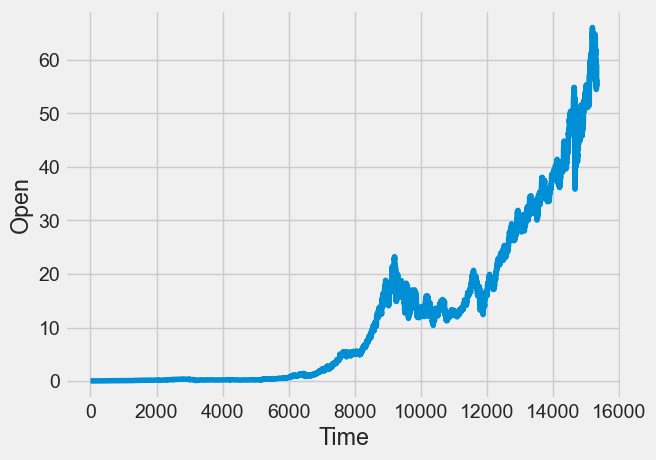

In [174]:
data = pd.read_csv("Coca-Cola_stock_history.csv") # Import data
df = data.iloc[:,1].values # We use "Open" column.
plt.plot(df)
plt.xlabel("Time")
plt.ylabel("Open")
plt.show()

In [175]:
df = df.reshape(-1,1)

scaler = MinMaxScaler(feature_range = (0,1)) # Normalize data
df = scaler.fit_transform(df)
np.max(df)

0.9999999999999999

In [176]:
# Test - Train Split
train_size = int(len(df) * 0.75) # % 75 Train
test_size = len(df) - train_size # % 25 Test
print("Train Size :",train_size,"Test Size :",test_size)

train = df[0:train_size,:]
test = df[train_size:len(df),:]

Train Size : 11483 Test Size : 3828


In [177]:
time_stemp = 10

datax = []
datay = []
for i in range(len(train)-time_stemp-1):
    a = train[i:(i+time_stemp), 0]
    datax.append(a)
    datay.append(train[i + time_stemp, 0])
trainx = np.array(datax)
trainy = np.array(datay)

datax = []
datay = []
for i in range(len(test)-time_stemp-1):
    a = test[i:(i+time_stemp), 0]
    datax.append(a)
    datay.append(test[i + time_stemp, 0])
testx = np.array(datax)
testy = np.array(datay)

trainx = np.reshape(trainx, (trainx.shape[0], 1, trainx.shape[1])) # For Keras
testx = np.reshape(testx, (testx.shape[0], 1,testx.shape[1])) # For Keras
print(trainx.shape)
testx.shape

(11472, 1, 10)


(3817, 1, 10)

In [178]:
epochs = 200
model = Sequential()
model.add(LSTM(10, input_shape = (1, time_stemp)))
model.add(Dense(1)) # Output Layer
model.compile(loss = "mean_squared_error", optimizer = "adam")
history = model.fit(trainx,trainy, epochs = epochs, batch_size = 50, verbose=0)

epoch = np.arange(0, epochs, 10)
losses = []
for i in epoch:
    if i % 10 == 0:
        losses.append(history.history["loss"][i])
        
data = {"epoch":epoch,"loss":losses}
data = pd.DataFrame(data) # Create dataframe for visualize with plotly

# Visualize
import plotly.express as px

fig = px.line(data,x="epoch",y="loss",width = 1200, height = 500)
fig.show()

In [179]:
train_predict = model.predict(trainx)
test_predict = model.predict(testx)

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
trainy = scaler.inverse_transform([trainy])
testy = scaler.inverse_transform([testy])

train_score = math.sqrt(mean_squared_error(trainy[0], train_predict[:,0])) # mean_squared_error -> Loss Function
print("Train Score : %2.f RMSE" % (train_score))
test_score = math.sqrt(mean_squared_error(testy[0], test_predict[:,0]))
print("Test Score : %2.f RMSE" % (test_score))

120/120 [==============================] - 0s 1ms/step
Train Score :  0 RMSE
Test Score :  1 RMSE


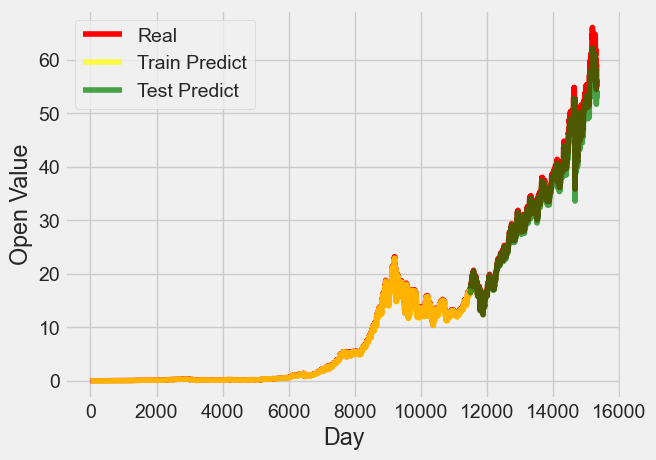

In [180]:
train_predict_plot = np.empty_like(df)
train_predict_plot[:,:] = np.nan
train_predict_plot[time_stemp:len(train_predict)+time_stemp, :] = train_predict

test_predict_plot = np.empty_like(df)
test_predict_plot[:, :] = np.nan
test_predict_plot[len(train_predict)+(time_stemp*2)+1:len(df)-1, :] = test_predict

plt.plot(scaler.inverse_transform(df),color = "red",label = "Real")
plt.plot(train_predict_plot,label = "Train Predict",color = "yellow",alpha = 0.7)
plt.plot(test_predict_plot,label = "Test Predict",color = "green", alpha = 0.7)
plt.legend()
plt.xlabel("Day")
plt.ylabel("Open Value")
plt.show()